# Heart Failure

In [1]:
import zipfile
import pandas as pd
import ehrapy as ep
import ehrdata as ed
from anndata import AnnData
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'heart_failure_clinical_records_dataset.csv'
87heart_failure_clinic 100% [=============================>]   18.69K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv]
87heart_failure_clinic 100% [=============================>]   18.69K    --.-KB/s87[Files: 1  Bytes: 18.69K [56.15]8

# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",
                   sep=",")

In [5]:
data["patient_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("heart_failure_ehrapy_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("heart_failure_ehrapy_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)


In [9]:
edata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Output()

! Features 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.


! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


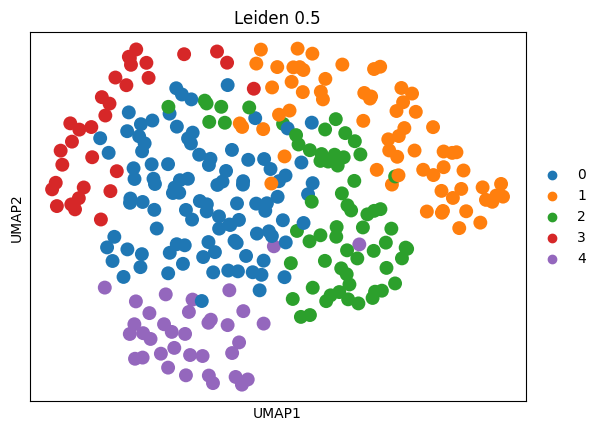

In [10]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

In [11]:
edata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

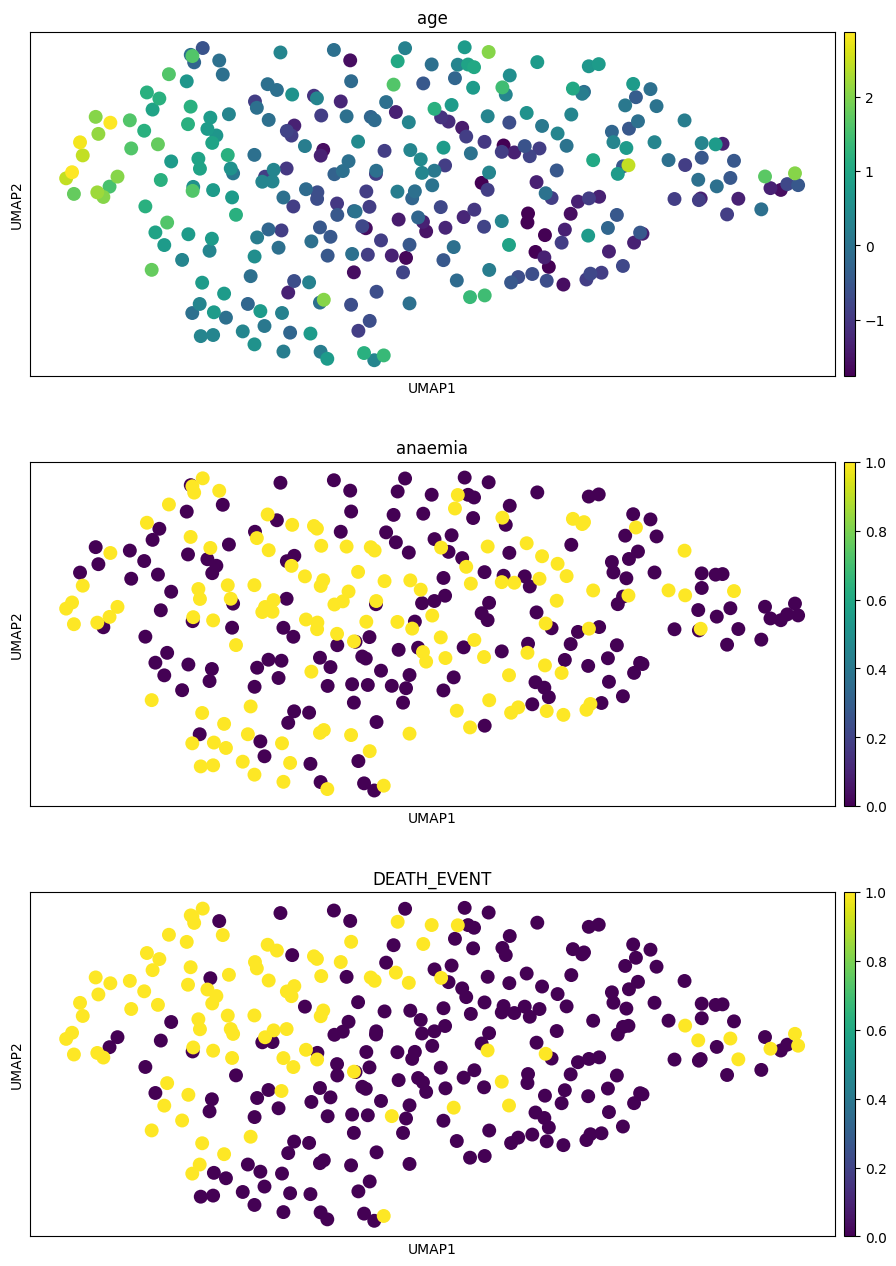

In [12]:
ep.pl.umap(edata, color=["age", "anaemia",
           "DEATH_EVENT", ], ncols=1, wspace=0.75)